# HW8 - Exploratory Data Analysis - Wine Quality

### *Aleksander Malinowski*

In [95]:
!pip install emoji

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170280 sha256=7695df24d5b556588686ba8addca5fb9014facd0cd823d9d1dfca9643224cbe6
  Stored in directory: c:\users\alex\appdata\local\pip\cache\wheels\7d\09\45\1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
sns.set()

## Wczytanie i zapoznanie z danymi

In [7]:
df = pd.read_csv('./winequality-red.csv')
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Sprawdzenie braków danych**

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Analiza

### Korelacja zmiennych

<AxesSubplot:>

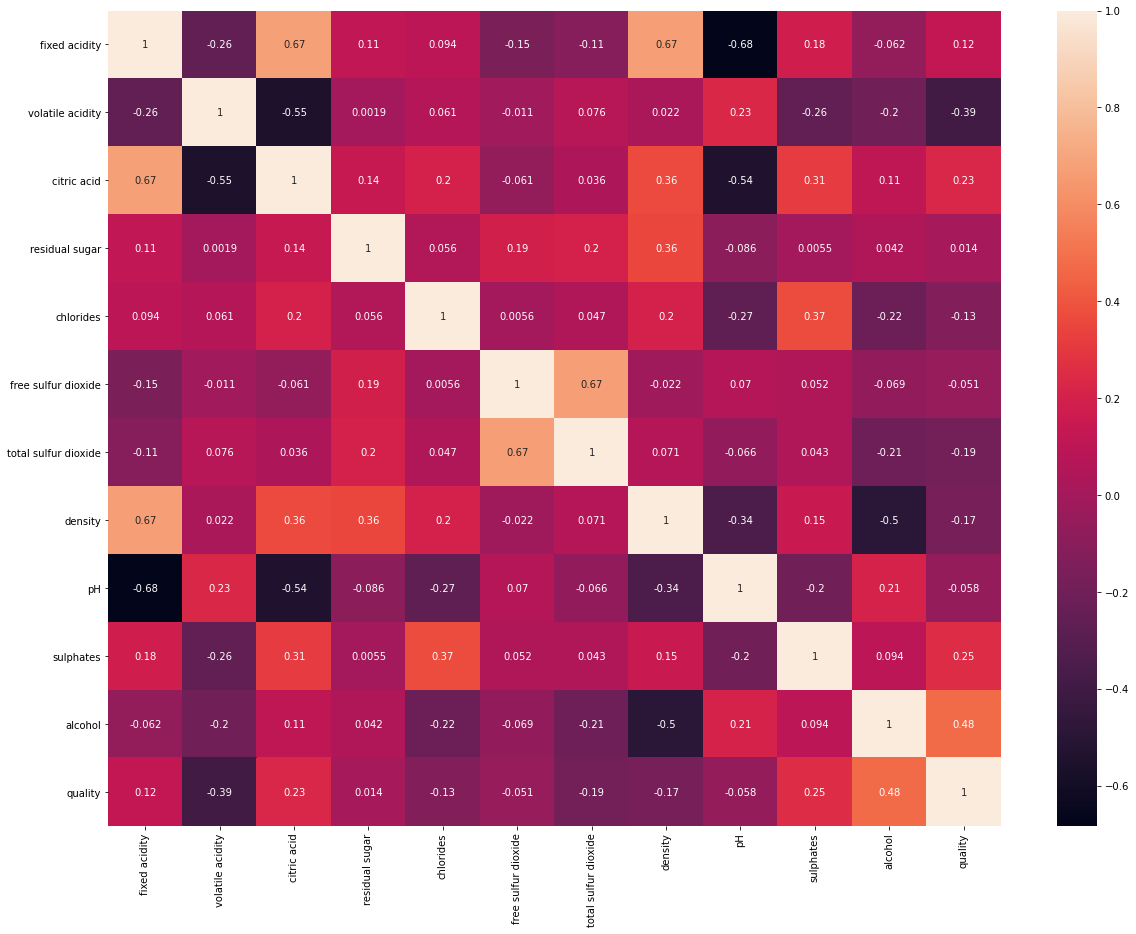

In [28]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)

* Zawartość alkoholu ma wyraźny związek z jakością wina
* Kolumna `volatile acidity` koreluje negatywnie z jakością

### Zależność między jakością a zawartością alkoholu - szczegółowa analiza

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

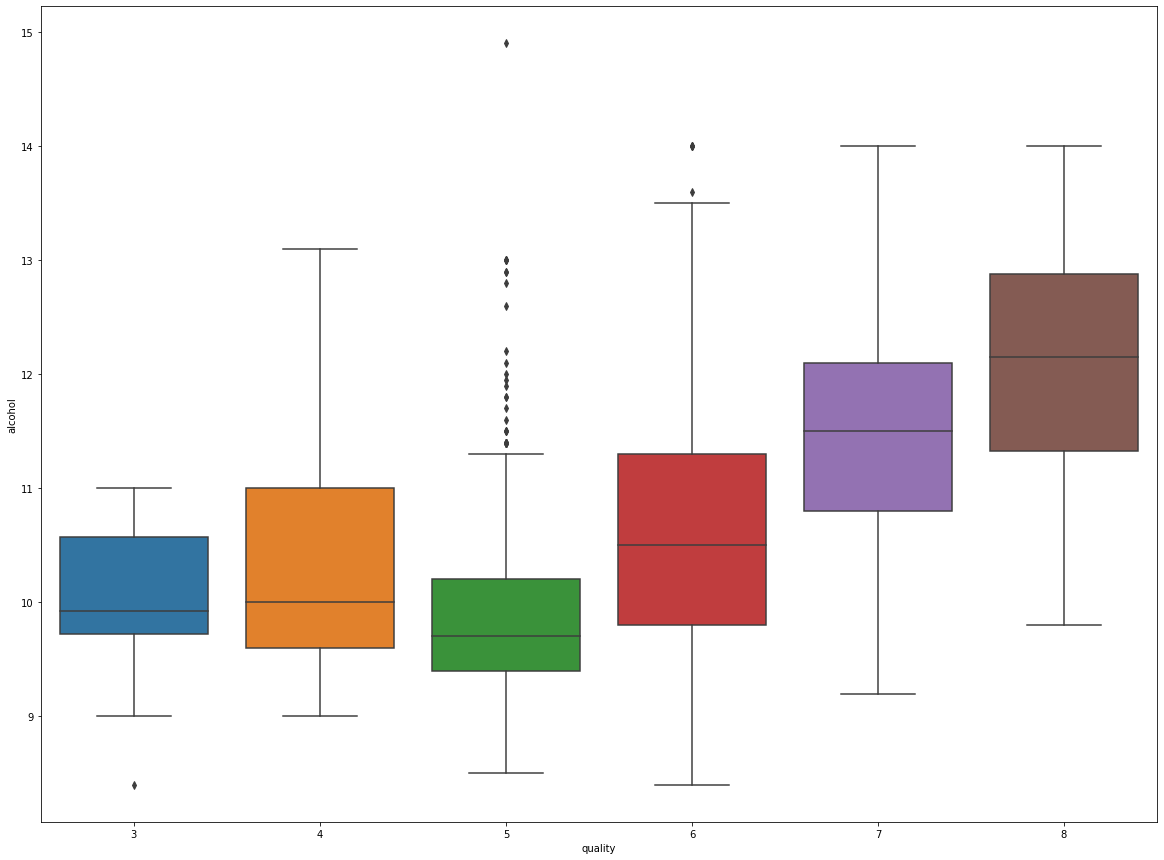

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df,y='alcohol',x ='quality')

Wysoko oceniane wina mają wyraźnie większą zawartość alkoholu. Sprawdźmy jeszcze dystrybucję tej zmiennej:

A:\Inzynieria_i_Analiza_Danych_PW\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

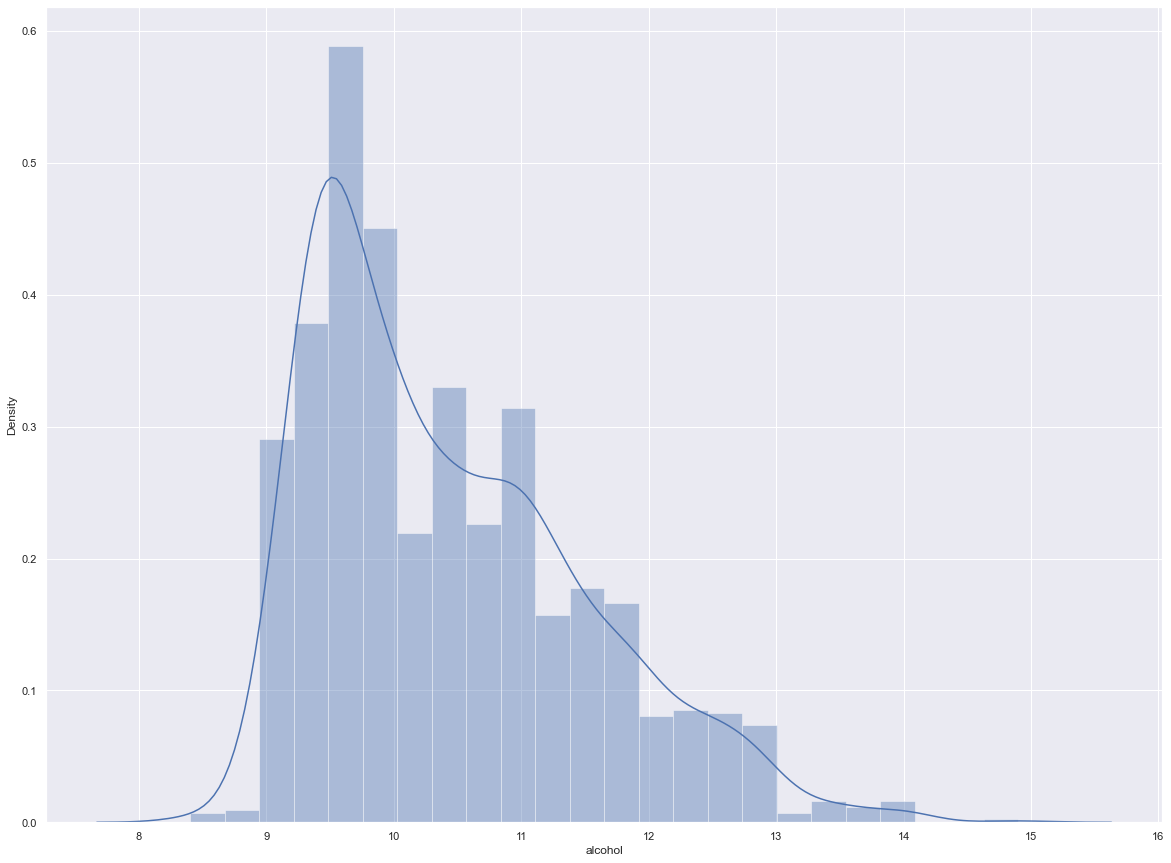

In [41]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.distplot(df['alcohol'])

Możemy zauważyć, że jest stosunkowo niewiele win o zawartości alkoholu mniejszej niż 9%, można też przypuszczać, że wartości są zaokrąglane, ponieważ widzimy peaki m.in. w 10.5 czy 11

### Zbadajmy teraz zależność między `volatile acidity` a jakością wina

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

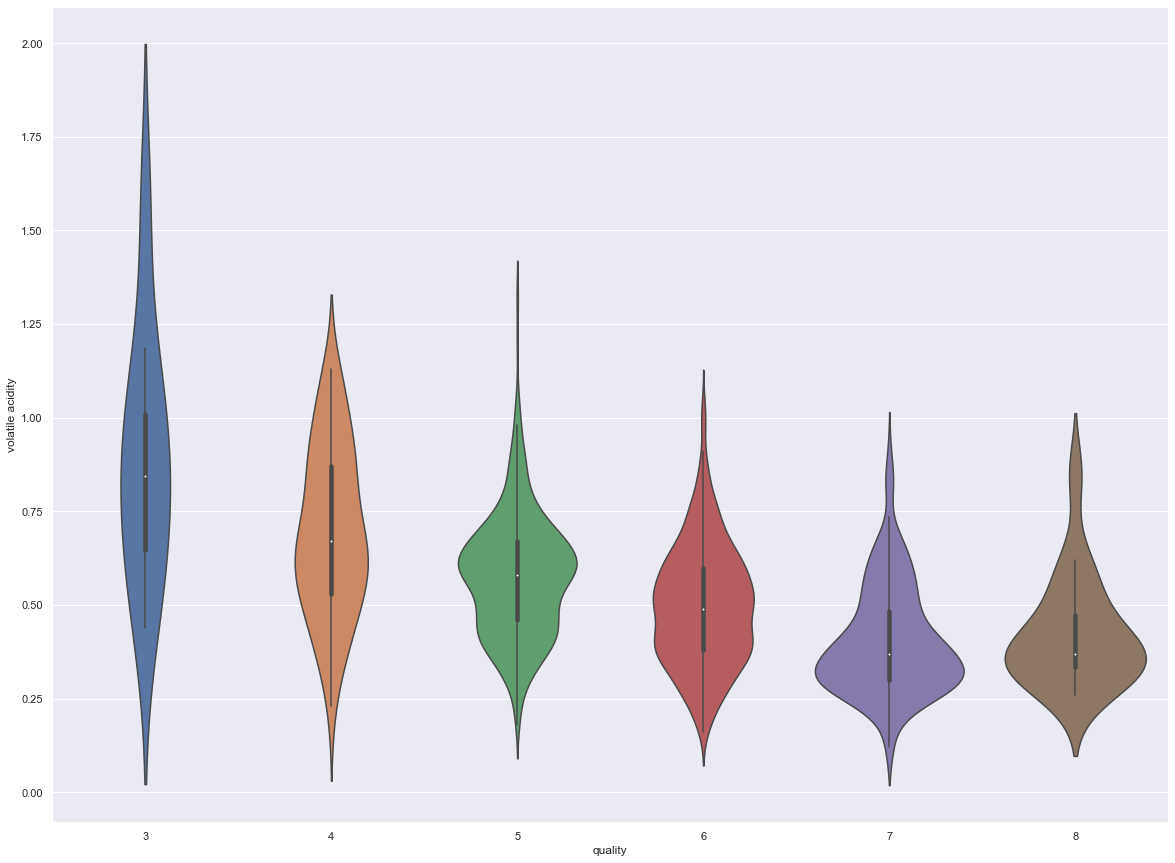

In [65]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.violinplot(data=df, y = 'volatile acidity', x = 'quality')

Wyraźnie widoczna jest tendencja spadkowa. Sprawdźmy jak `volatile acidity`, które oznacza zawartość ulatniających się kwasów, ma się do zawartości kwasu cytrynowego w winie

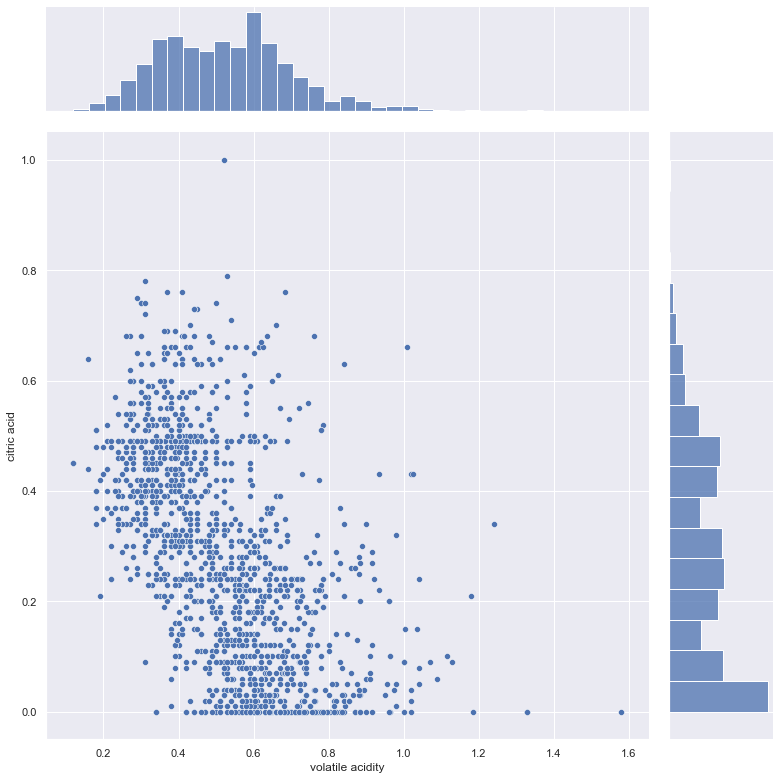

In [61]:
sns.jointplot(x = 'volatile acidity', y = 'citric acid', data = df,height=11)

Wysoka zawartość kwasu cytrynowego wpływa na zmniejszenie ilości lotnych kwasów w winie. Może to sugerować, że wysoka jakość wina ma pośrednio związek z zawartością kwasu cytrynowego. Sprawdźmy to:

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

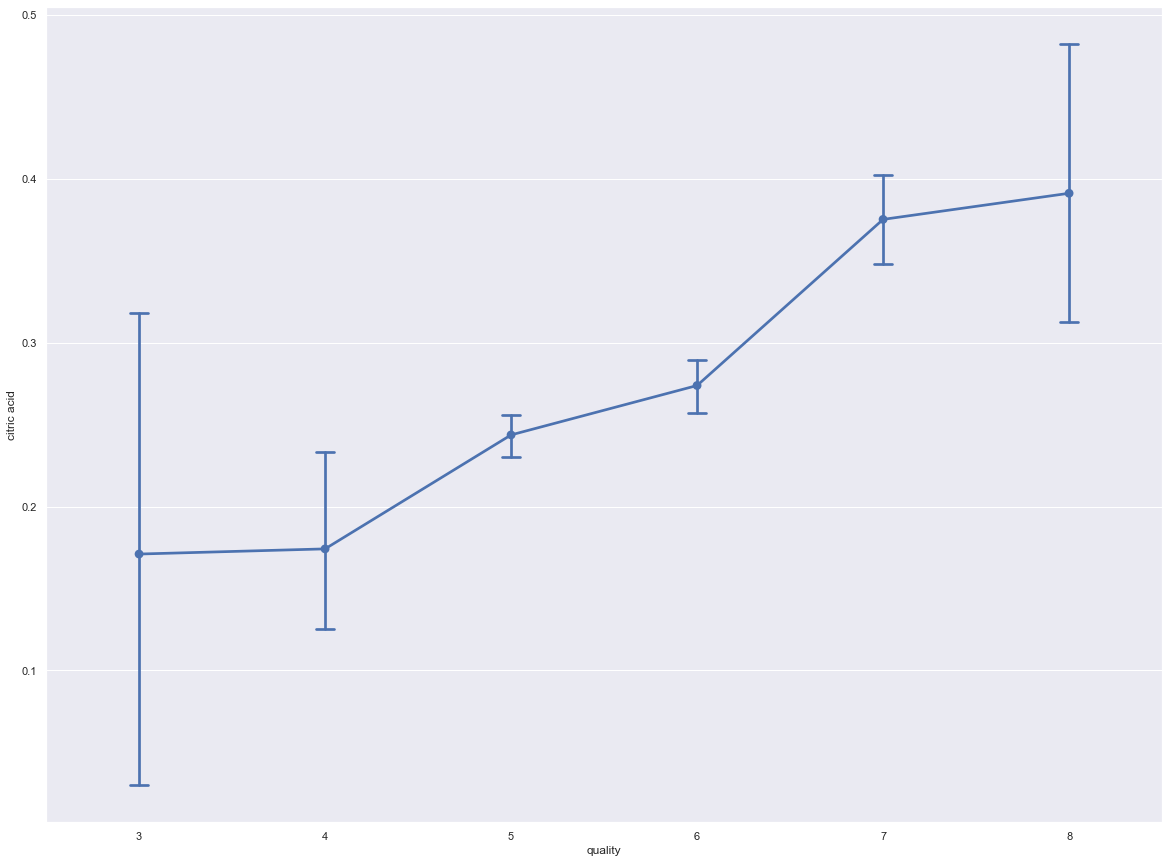

In [80]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.pointplot(data=df,x='quality',y='citric acid',capsize=0.1)

Zgodnie z przewidywaniami, wraz ze wzrostem jakości widać też tendencję wzrostową dla zawartości kwasu cytrynowego

### Liczba outlierów

Analiza pokazała, że istnieją zależności między niektórymi kolumnami a kolumną `quality`. Jednak czy od tych reguł nie ma wyjątków? Sprawdźmy:

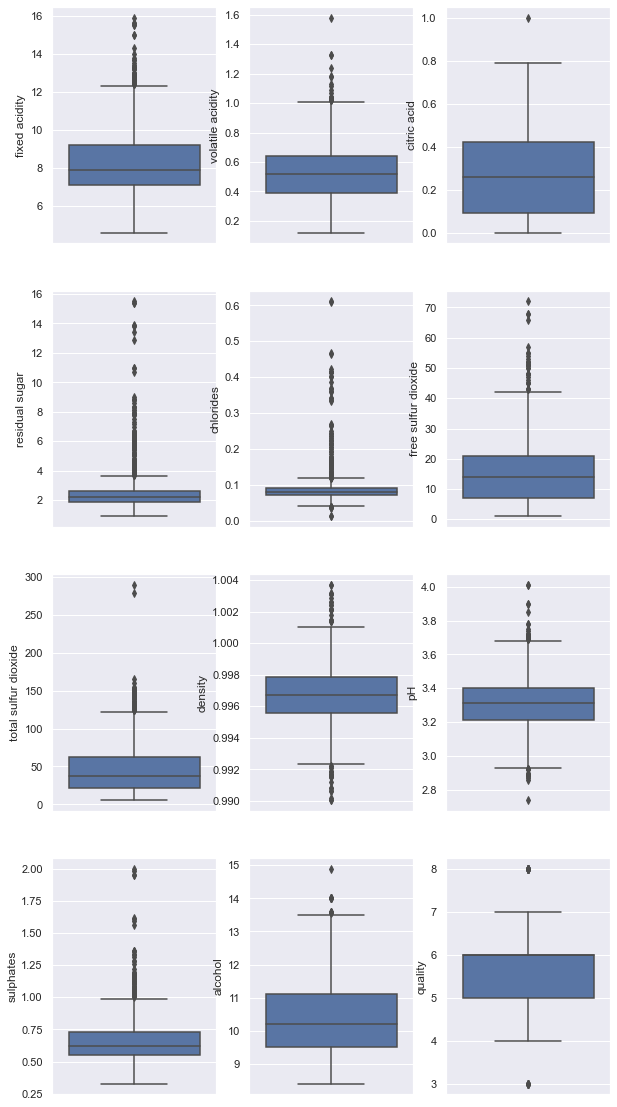

In [92]:
fig,ax = plt.subplots(figsize=(10,20),nrows=4,ncols=3)

ax = ax.flatten()
i = 0
for column,_ in df.items():
    sns.boxplot(data = df, y  = column, ax = ax[i])
    i += 1
plt.show()

Widzimy, że dane są mocno zróżnicowane, wiele jest win, które odbiegają parametrami od średnich wartości. Dobrze widać to na przykładzie tego wykresu:

A:\Inzynieria_i_Analiza_Danych_PW\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

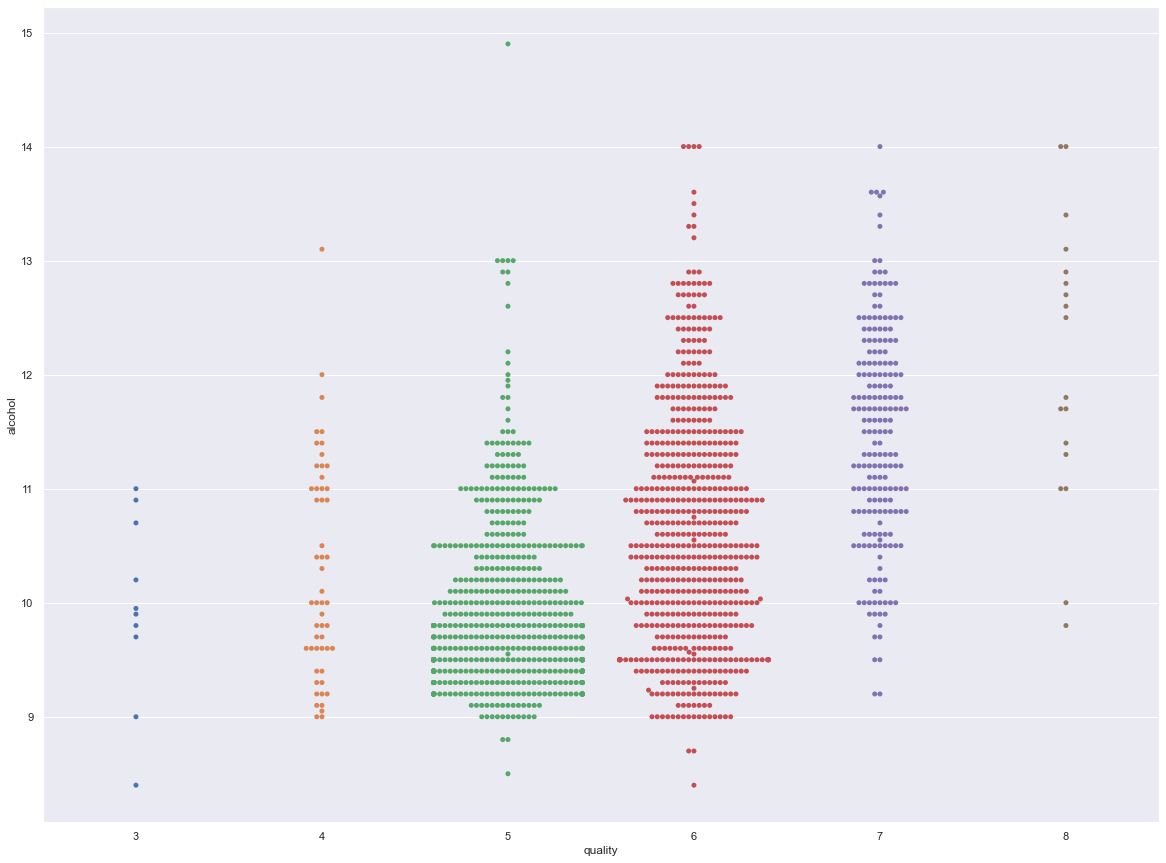

In [94]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.swarmplot(data = df, x = 'quality', y = 'alcohol')

Mimo że ogólny trend jest widoczny, mamy też kilka przeciętnie ocenianych win o wyższej zawartości alkoholu, jak i wysoko oceniane trunki, które mają w sobie mniej procentów

## Podsumowanie

**Z powyższych analiz i wykresów można wyciągnąć następujące wnioski:**

* Średnia ocena win wykazuje pozytywną korelację z zawartością alkoholu. Na ogół mocniejsze wina były lepiej oceniane

* Co ciekawe, wysoka zawartość lotnych kwasów jest raczej niepożądana, z opisu ramki danych wynika, że mogą one odpowiadać za cierpki smak napoju

* Jednocześnie, im mniejsza zawartość kwasów, które się ulatniają, tym wyższa zawartość kwasu cytrynowego, który jest szeroko używany jako wzmacniacz smaku różnego rodzaju żywności, w tym napojów alkoholowych. Może to być powodem wyższej średniej oceny zawierających go trunków

* Różnice i rozbieżności w danych i zależnościach ocen od wymienionych zmiennych są jednak na tyle istotne, że można wysnuć na tej podstawie inny wniosek - o gustach się nie dyskutuje! 😉
